In [ ]:
# https://scikit-image.org/docs/stable/auto_examples/edges/plot_active_contours.html#sphx-glr-download-auto-examples-edges-plot-active-contours-py

### Active Contour Model¶
The active contour model is a method to fit open or closed splines to lines or edges in an image 1. It works by minimising an energy that is in part defined by the image and part by the spline’s shape: length and smoothness. The minimization is done implicitly in the shape energy and explicitly in the image energy.

In the following two examples the active contour model is used (1) to segment the face of a person from the rest of an image by fitting a closed curve to the edges of the face and (2) to find the darkest curve between two fixed points while obeying smoothness considerations. Typically it is a good idea to smooth images a bit before analyzing, as done in the following examples.

We initialize a circle around the astronaut’s face and use the default boundary condition boundary_condition='periodic' to fit a closed curve. The default parameters w_line=0, w_edge=1 will make the curve search towards edges, such as the boundaries of the face.

1
Snakes: Active contour models. Kass, M.; Witkin, A.; Terzopoulos, D. International Journal of Computer Vision 1 (4): 321 (1988). DOI:10.1007/BF00133570

### sources https://www.youtube.com/watch?v=FROJUMk9P3Y&t=107s&ab_channel=FirstPrinciplesofComputerVision

# 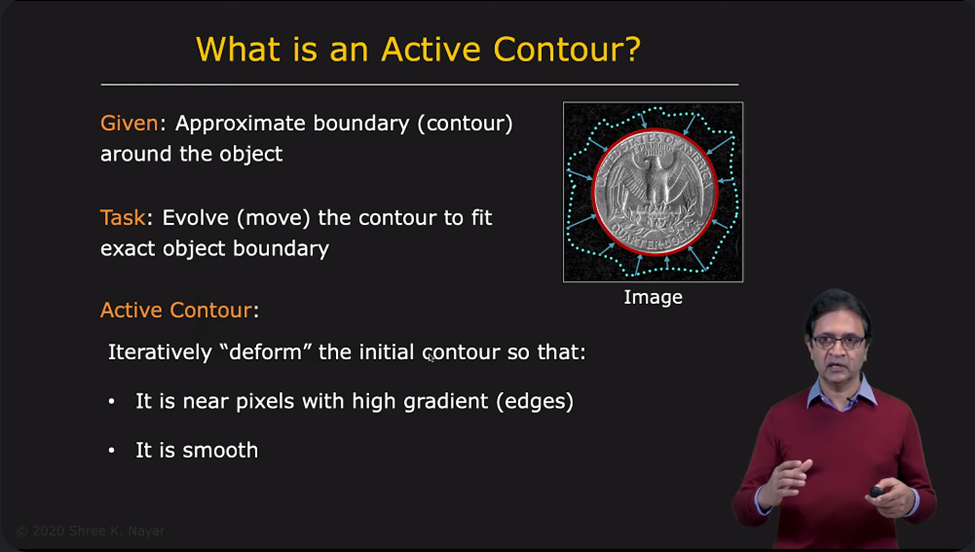

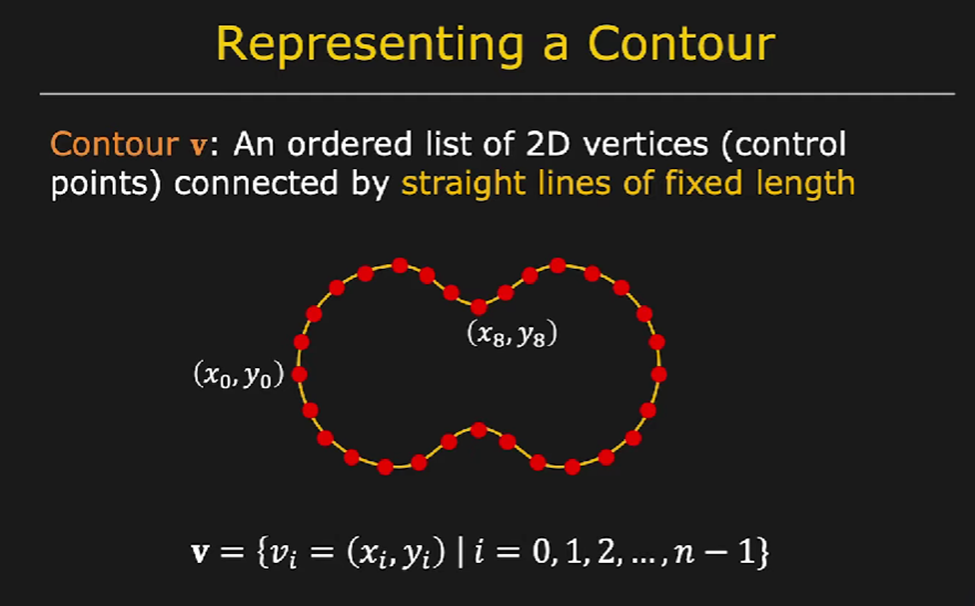

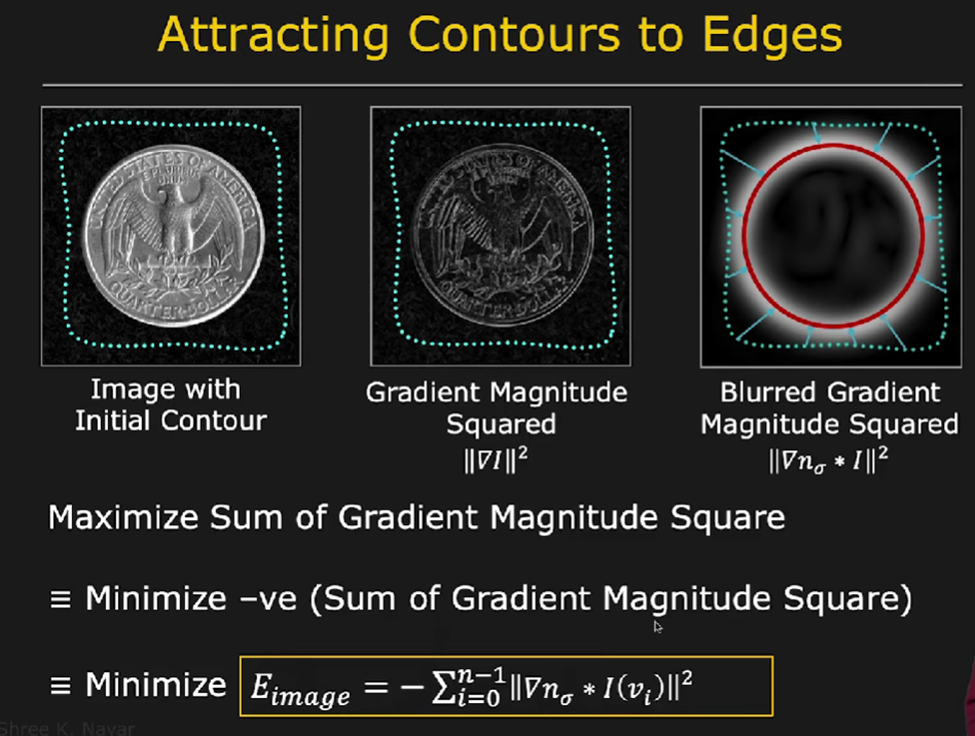

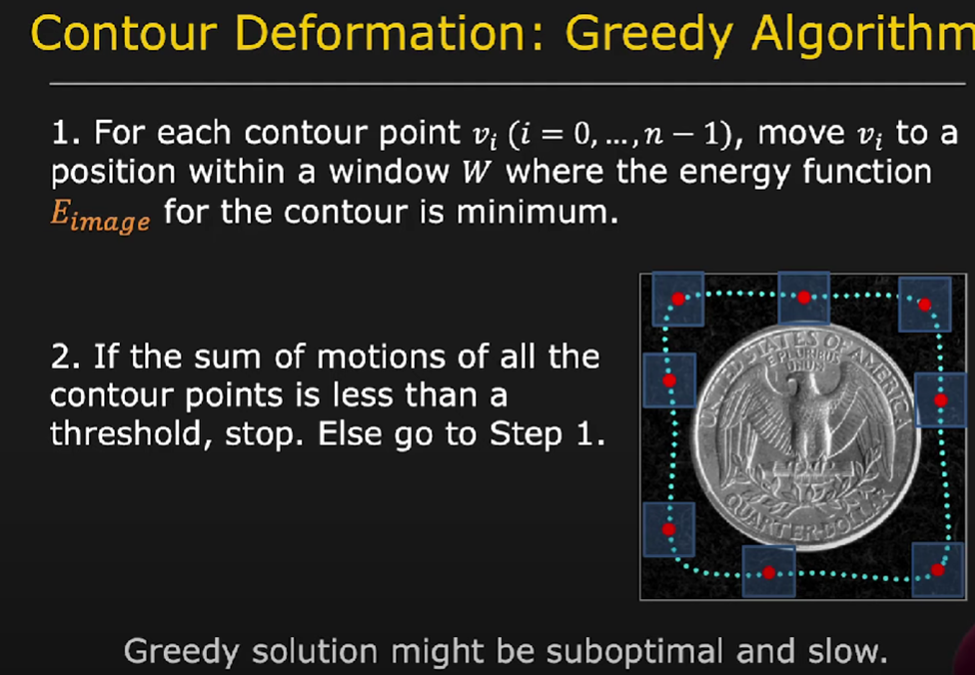

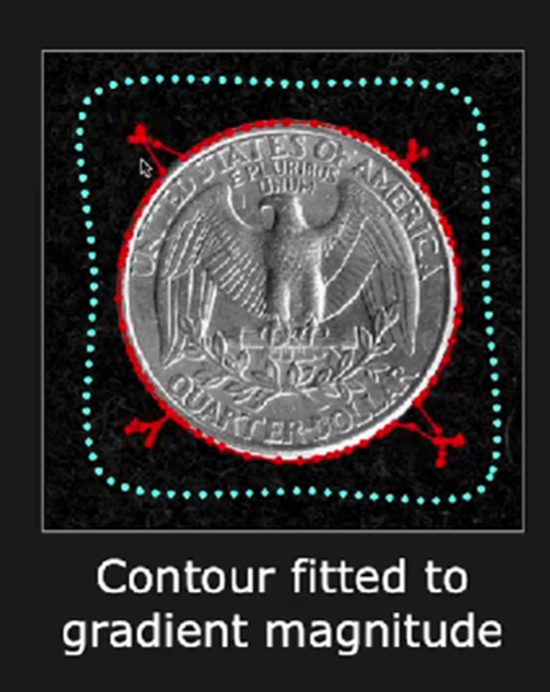

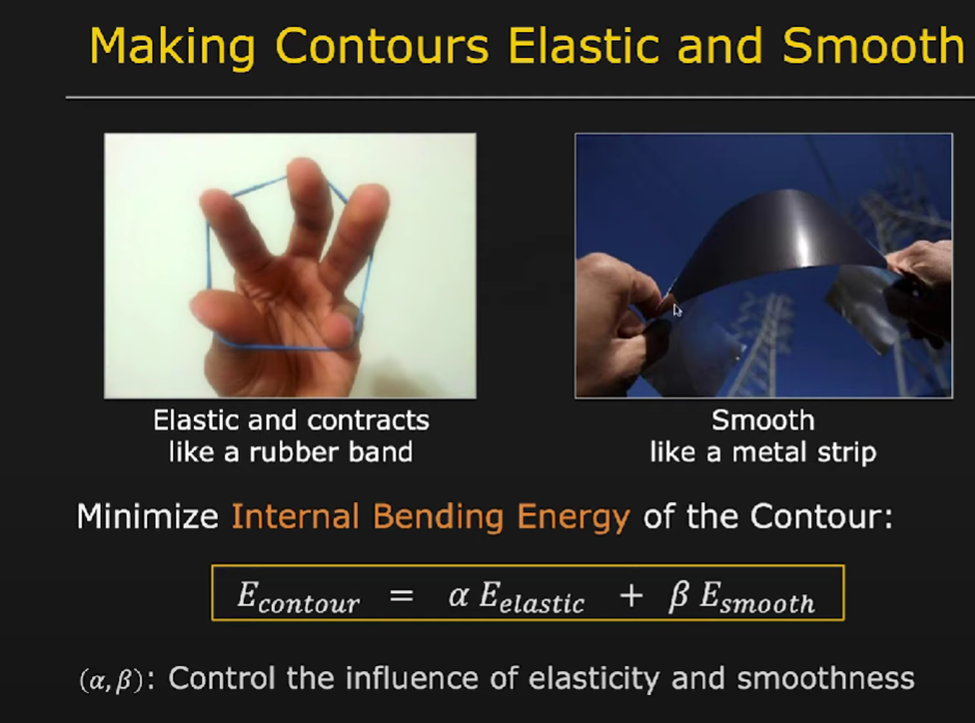

 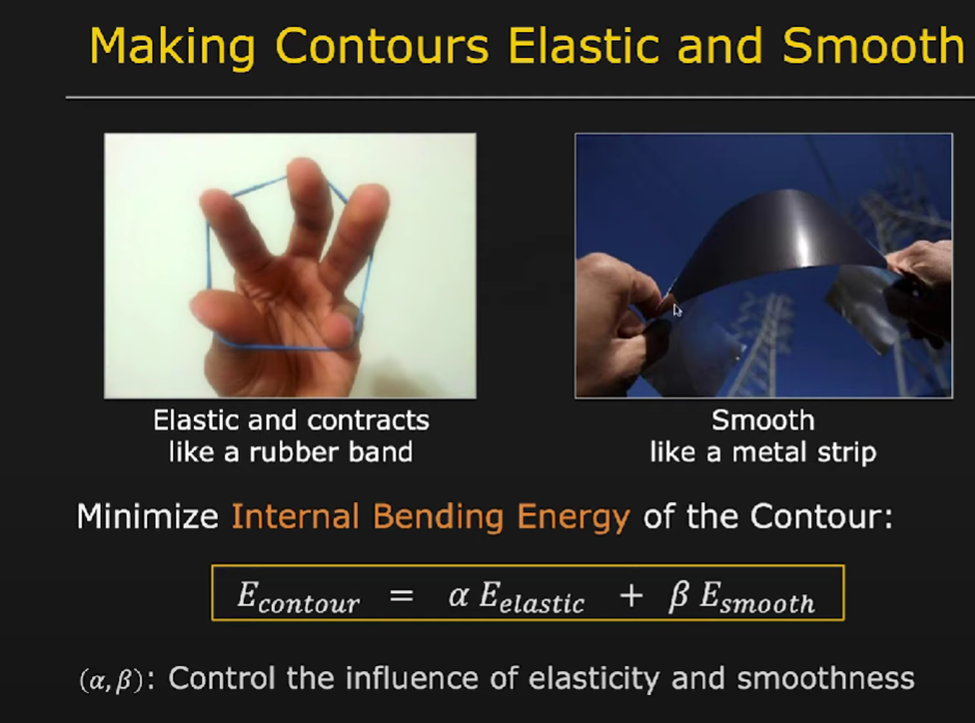

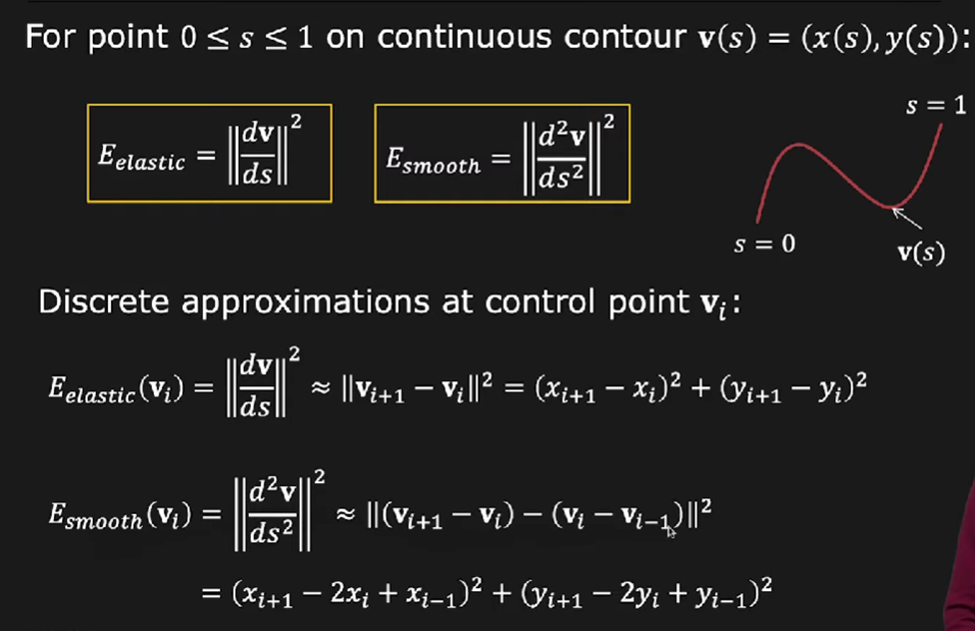

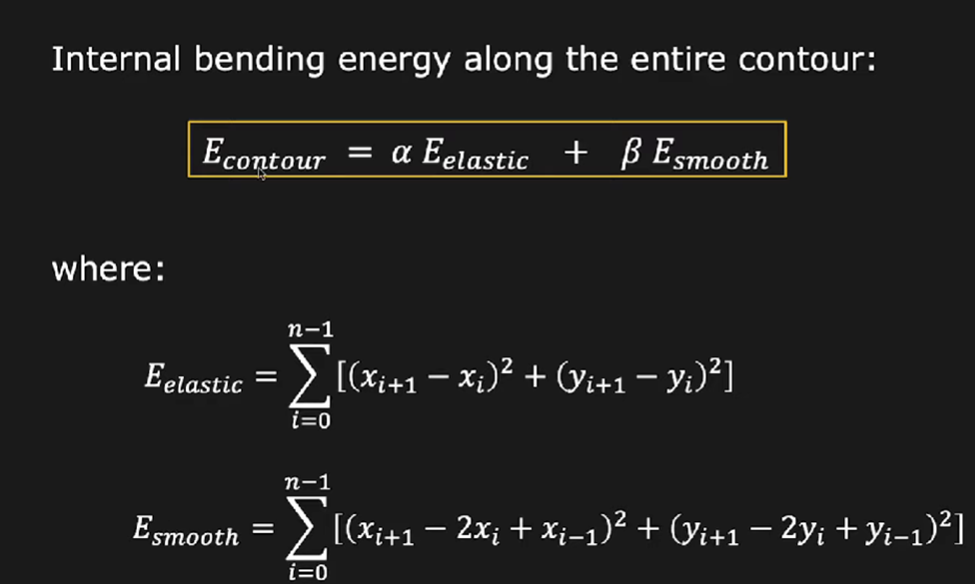

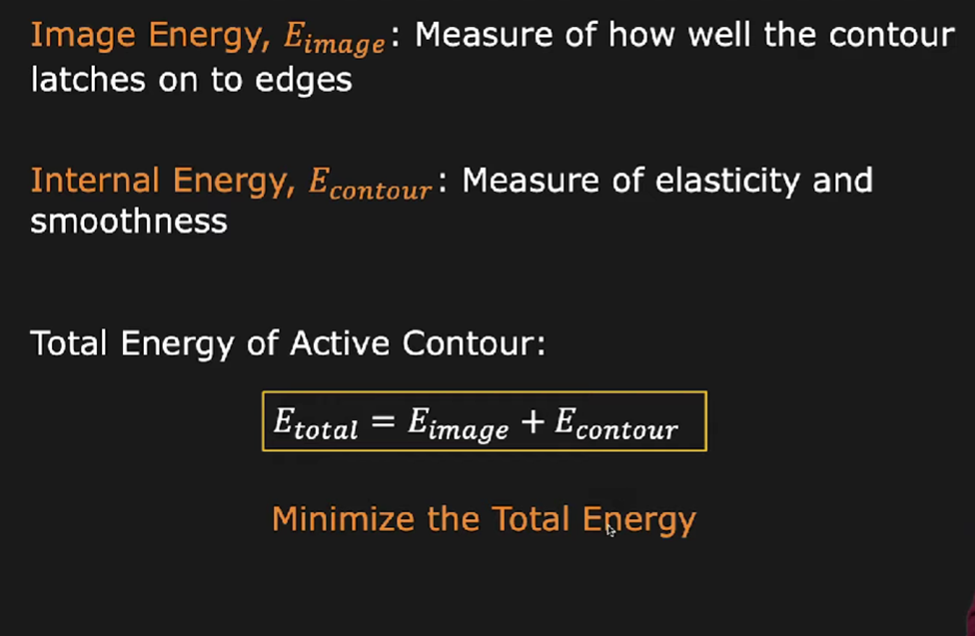

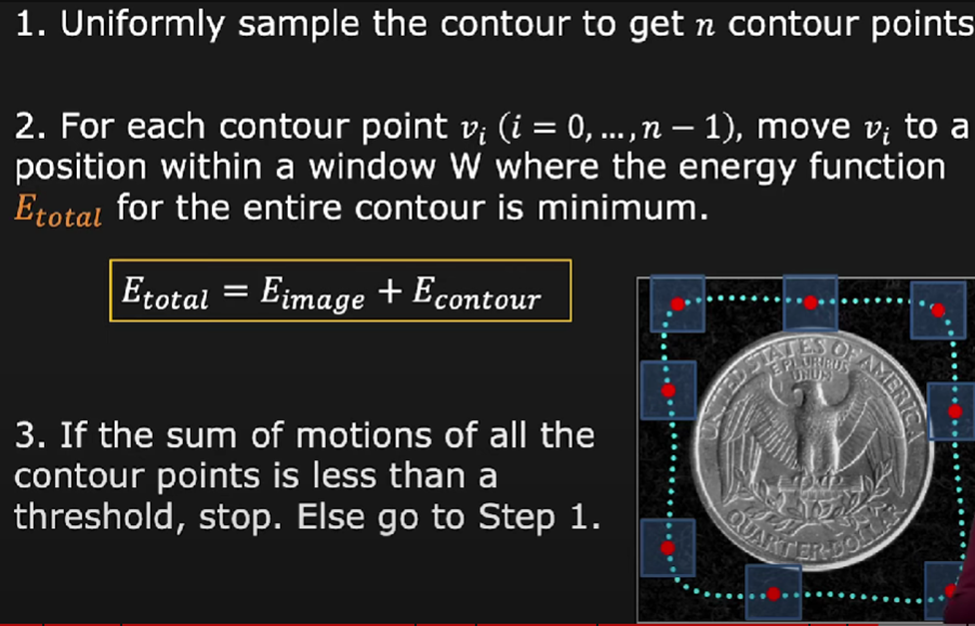

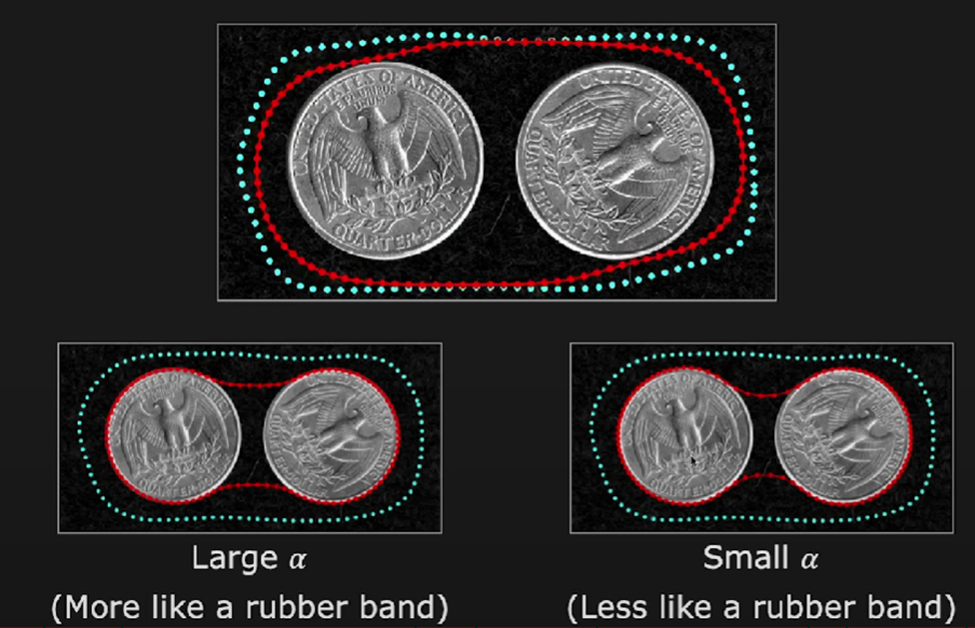

C:\Users\hieub\miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\hieub\miniconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\hieub\miniconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


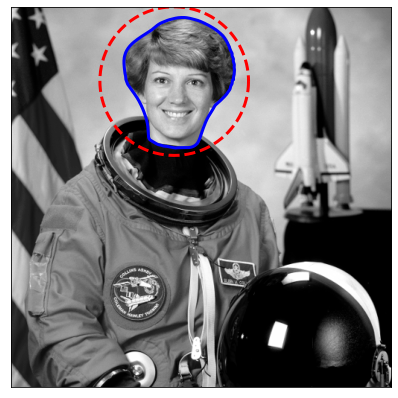

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour


img = data.astronaut()
img = rgb2gray(img)

s = np.linspace(0, 2*np.pi, 400)
r = 100 + 100*np.sin(s)
c = 220 + 100*np.cos(s)
init = np.array([r, c]).T

snake = active_contour(gaussian(img, 3, preserve_range=False),
                       init, alpha=0.015, beta=10, gamma=0.001)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()

Accumulation of water begins in the lowest part of the basin as per the depth contours (Figure 3d). The water elevation increases in the basins until two previously isolated water lakes converge with each other. When water lakes of two different basins encounter each other, the pixel location is denoted as the watershed ridge line. At the completion of the flooding process, all watershed ridge line pixels are determined. At this point, the watershed ridge line splits the two touching pores (Figure 3e). As mentioned above, brighter points in the distance image signify points farther from the boundary of a pore. In this study, the city block distance equation was used to create the distance image. For two pixels with x and y coordination, the city block equation can be described as follows: City block distance = |x1 - x2| + |y1 - y2|.
 
Figure 3. Sample segmentation using the watershed method [25]: (a) original binary image; (b) grayscale distance image; (c) topological surface; (d) depth contours; (e) detected pores separated by the watershed ridge line.


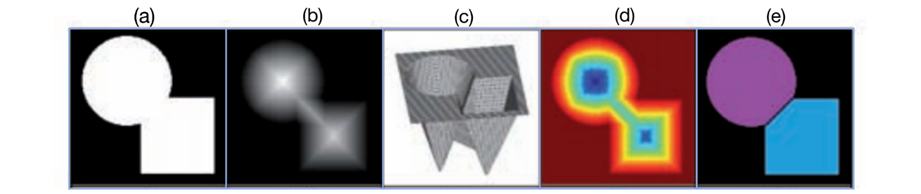